# Interactive Visualization of Malaria Cell Classification Results

This notebook provides an interactive environment to visualize the results of the malaria cell classification project. It uses utility functions from the project codebase for embedding extraction, t-SNE visualization, and training metrics plotting.

In [ ]:
# Import required libraries
import warnings

import torch

# Import project modules
from malaria.data import MalariaDataModule
from malaria.model import MalariaLitModel
from malaria.utils import EmbeddingVisualizer

## Load Data and Model Checkpoint

Set the paths for your data directory, model checkpoint, and log directory. Then load the data and model for visualization.

In [2]:
# Set paths (edit as needed)
DATA_DIR = "data"
MODEL_PATH = "lightning_logs/malaria_cnn/version_0/checkpoints/last.ckpt"
LOG_DIR = "lightning_logs/malaria_cnn/version_0"

# Hyperparameters
BATCH_SIZE = 32


In [3]:

# Load data module and setup
data_module = MalariaDataModule(data_dir=DATA_DIR, batch_size=BATCH_SIZE)
data_module.setup()
train_loader = data_module.train_dataloader()

# Load model from checkpoint
model = MalariaLitModel()
checkpoint = torch.load(MODEL_PATH, map_location="cpu")
if "state_dict" in checkpoint:
    model.load_state_dict(checkpoint["state_dict"])
else:
    model.load_state_dict(checkpoint)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Visualize Results with Utility Functions

This section demonstrates how to visualize the model's training process and results using the provided utility functions. You will see how to extract embeddings, plot dimensionality reduction visualizations (t-SNE, UMAP, PCA), and review training metrics to better understand model performance and behavior.

### Embeddings Extraction

Embeddings are compact, high-dimensional vector representations of input data (such as images or text) learned by a neural network. In the context of malaria cell classification, embeddings capture the essential features of cell images that the model uses to distinguish between classes (e.g., infected vs. uninfected).

Extracting embeddings involves passing the dataset through the trained model and collecting the output from an intermediate layer (typically before the final classification layer). These embeddings can then be visualized or analyzed using dimensionality reduction techniques (like t-SNE, UMAP, or PCA) to gain insights into how the model organizes and separates different classes in its learned feature space. This process helps in understanding model behavior, identifying clusters, and detecting potential issues such as misclassifications or overlapping classes.

In [4]:
# Create EmbeddingVisualizer instance
visualizer = EmbeddingVisualizer(model, train_loader, device)

# Extract embeddings and labels (output silenced)
# This may take some time depending on the dataset size
visualizer.extract_embeddings();


### Training Metrics Visualization

The training metrics plot provides insights into the model's learning process over time. It typically includes curves for training and validation loss, as well as accuracy or other relevant metrics. Monitoring these metrics helps identify issues such as overfitting (when validation loss increases while training loss decreases) or underfitting (when both losses remain high). Use these plots to assess model performance, convergence, and to guide hyperparameter tuning.

**Accuracy** measures the proportion of correct predictions made by the model out of all predictions. In the training process, training accuracy reflects how well the model fits the training data. In the validation process, validation accuracy indicates how well the model generalizes to unseen data.

**Loss** quantifies the difference between the model's predictions and the actual target values. During training, training loss shows how well the model is learning from the training data. Validation loss, calculated on a separate validation set, helps monitor whether the model is overfitting (memorizing training data) or underfitting (failing to capture patterns). Lower loss values generally indicate better model performance.

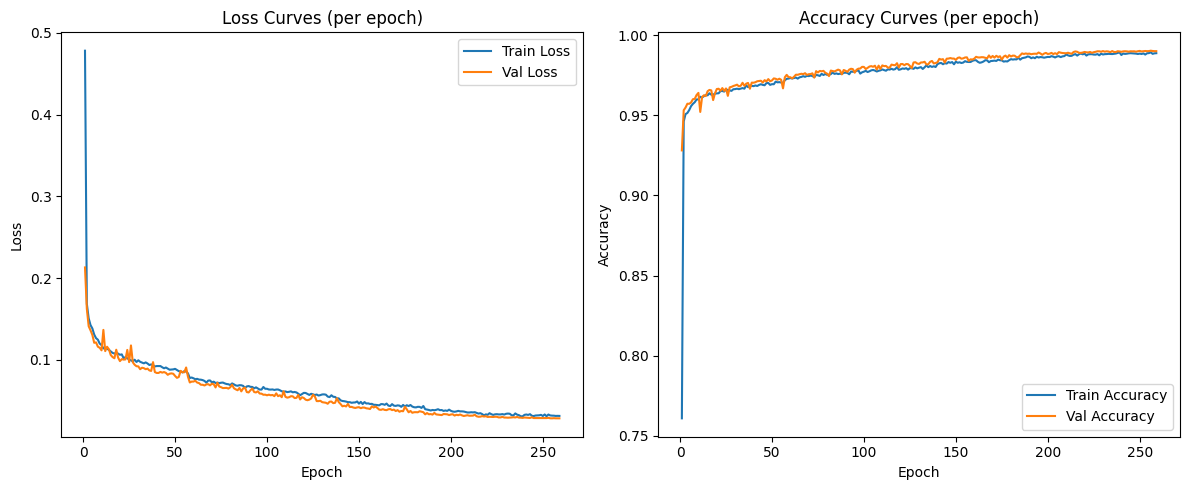

In [5]:
# Plot training metrics
EmbeddingVisualizer.plot_training_metrics(LOG_DIR, save_path=None)  # Show plot inline

### t-SNE Visualization of Embeddings

t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data in two or three dimensions. In the context of malaria cell classification, t-SNE helps project the learned high-dimensional embeddings of cell images into a 2D space, making it easier to visually inspect how the model separates different classes (e.g., infected vs. uninfected cells).

By preserving local structure, t-SNE can reveal clusters and patterns in the data that correspond to different cell types or prediction outcomes. This visualization is useful for understanding how well the model has learned to distinguish between classes and for identifying potential issues such as overlapping clusters or outliers.

**Limitations:**  
- t-SNE is computationally intensive and can be slow on large datasets.
- The resulting plots can vary significantly with different parameter choices (such as perplexity) and random seeds.
- t-SNE primarily preserves local relationships, so distances between clusters may not reflect true relationships in the original space.
- It is not suitable for inferring global data structure or for quantitative analysis.

Despite these limitations, t-SNE remains a valuable tool for qualitative assessment of model embeddings and for gaining intuition about the learned feature space.

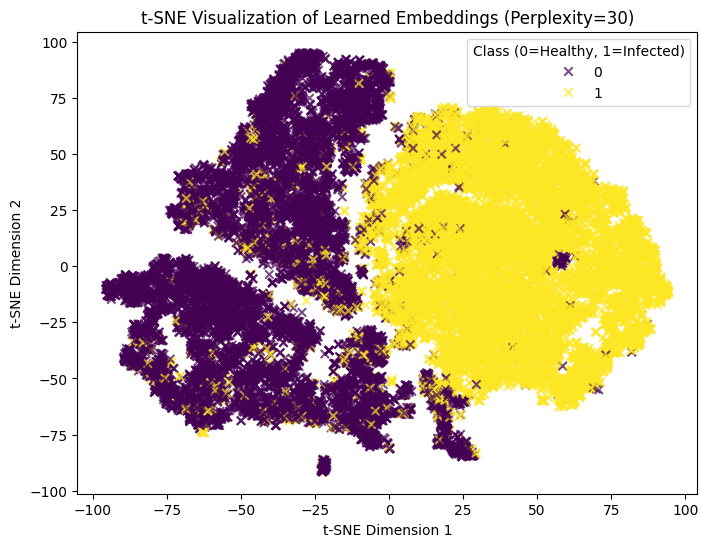

In [6]:
# Plot t-SNE visualization
visualizer.plot_tsne(save_path=None)  # Show plot inline


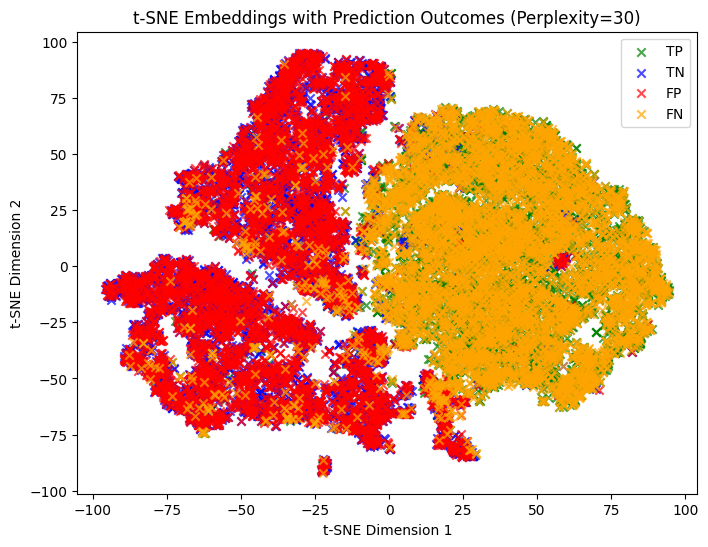

In [7]:
# Plot t-SNE with outcome labels
visualizer.plot_tsne(overlay="outcome", dataloader=train_loader, model=model)

## UMAP Visualization of Embeddings

UMAP (Uniform Manifold Approximation and Projection) is a powerful dimensionality reduction technique that often preserves both local and global structure better than t-SNE. Below, we visualize the learned embeddings using UMAP.

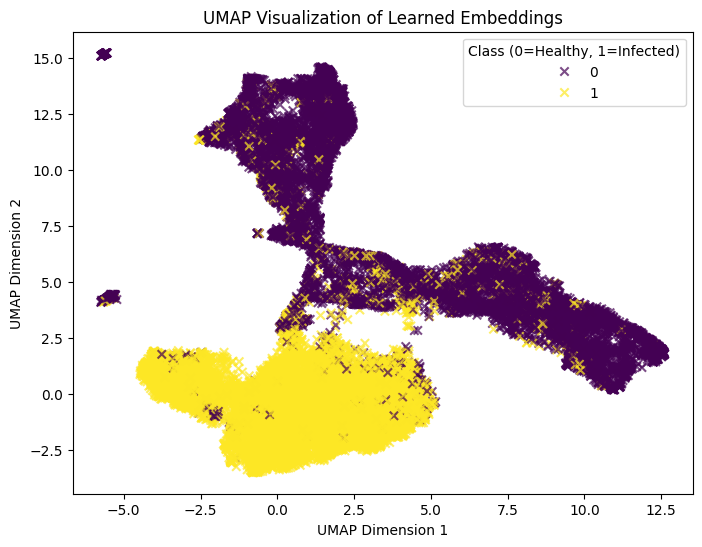

In [ ]:
# UMAP visualization using EmbeddingVisualizer method
with warnings.catch_warnings(): # Ignore warnings from UMAP
    warnings.simplefilter("ignore")
    visualizer.plot_umap()

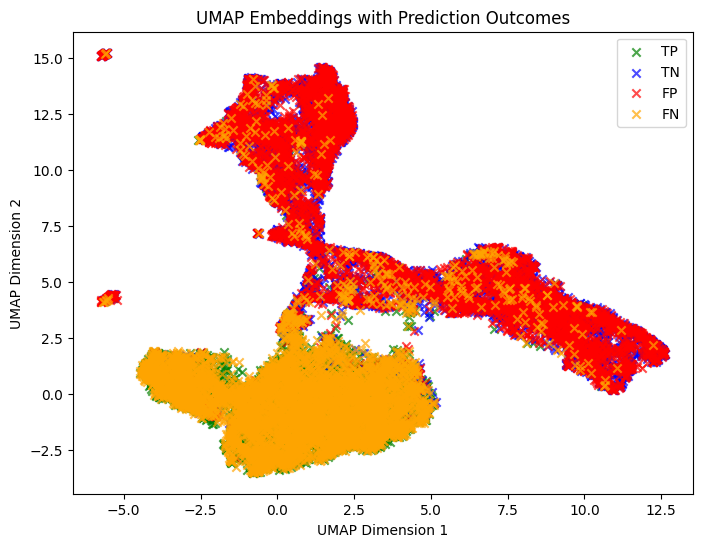

In [12]:
# Plot UMAP visualization
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    visualizer.plot_umap(overlay="outcome", dataloader=train_loader, model=model)

## PCA Visualization of Embeddings

PCA (Principal Component Analysis) is a linear dimensionality reduction technique that projects the data onto the directions of maximum variance. Below, we visualize the learned embeddings using PCA.

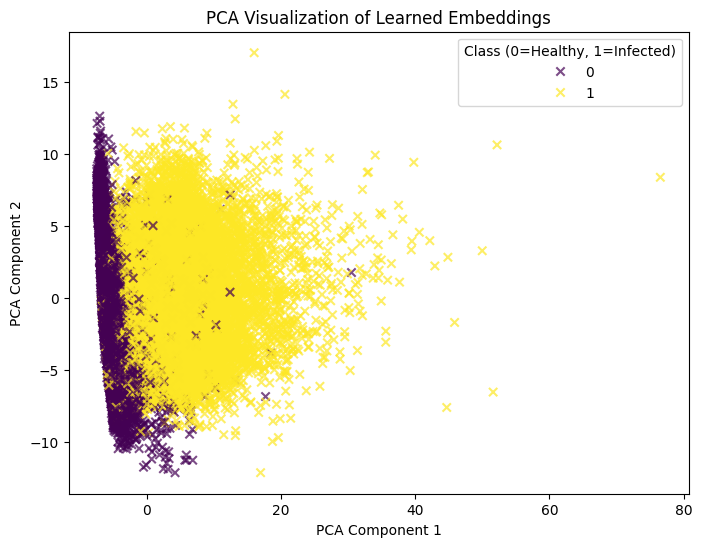

In [13]:
# PCA visualization using EmbeddingVisualizer method
visualizer.plot_pca()

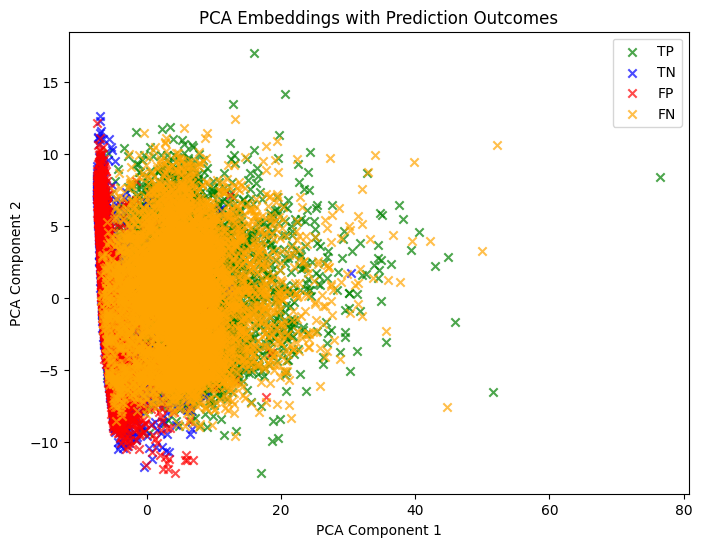

In [14]:
# PCA with prediction outcomes using EmbeddingVisualizer method
visualizer.plot_pca(overlay="outcome", dataloader=train_loader, model=model)